In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1.1
abs = pd.read_csv(r'airbnb-seattle-listings.csv', sep=',')
abs.head(3)

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20190922030624,2019-09-22,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, 1917 Dutch Colo...",none,Madrona is a hidden gem of a neighborhood. It ...,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.21
1,5682,https://www.airbnb.com/rooms/5682,20190922030624,2019-09-22,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.99
2,6606,https://www.airbnb.com/rooms/6606,20190922030624,2019-09-22,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","Soo centrally located, this is a little house ...","This tiny cottage is only 15x10, but it has ev...",none,"A peaceful yet highly accessible neighborhood,...",...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,1.19


In [3]:
# 1.2
abs2 = abs[["price", "bedrooms", "square_feet", "name"]]
abs2.head(3)

,price,bedrooms,square_feet,name
0,$296.00,4.0,NaN,Casa Madrona - Urban Oasis 1 block from the park!
1,$48.00,0.0,NaN,"Cozy Studio, min. to downtown -WiFi"
2,$90.00,1.0,NaN,"Fab, private seattle urban cottage!"


there are missing values in square feet variable.

In [7]:
# 1.3
# (a)
rows,columns = abs2.shape
print("rows:", rows, "columns:", columns)

rows: 9040 columns: 4


In [8]:
# (b)
abs2.isna().sum()

price             0
bedrooms          1
square_feet    8633
name              1
dtype: int64

In [9]:
# (c)
abs2.dtypes

price           object
bedrooms       float64
square_feet    float64
name            object
dtype: object

In [ ]:
# 1.4

We might need bed rooms and price variables for the analysis below, but data in price are in string type, not in numerical type. Thus unable to use directly.

In [12]:
# 2.1
abs2["price_float"] = abs2.price.str.replace("[$]", "")
abs2["price_float"] = abs2.price_float.str.replace("[,]", "").astype(float)
abs2.dtypes

/tmp/ipykernel_60/2274106693.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  abs2["price_float"] = abs2.price.str.replace("[$]", "")
/tmp/ipykernel_60/2274106693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abs2["price_float"] = abs2.price.str.replace("[$]", "")
/tmp/ipykernel_60/2274106693.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  abs2["price_float"] = abs2.price_float.str.replace("[,]", "").astype(float)
/tmp/ipykernel_60/2274106693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

price           object
bedrooms       float64
square_feet    float64
name            object
price_float    float64
dtype: object

In [14]:
abs2.sample(10)

,price,bedrooms,square_feet,name,price_float
4065,$47.00,1.0,NaN,Adorable Room near Light Rail Station,47.0
8707,$322.00,4.0,NaN,"NEW LISTING! Spacious, family-friendly home w/...",322.0
413,$63.00,1.0,NaN,Bungalow in beautiful Fremont,63.0
76,$85.00,1.0,500.0,Phinney Oasis-Ballard/Phinney,85.0
5515,$95.00,1.0,NaN,Quiet convenient W. Seattle home w/private bal...,95.0
1811,$65.00,0.0,NaN,Private Cozy Place in Chinatown,65.0
8640,$30.00,1.0,NaN,Urban one bedroom with easy access to DT Seattle,30.0
5131,$117.00,2.0,NaN,Bright 2BR w/ Private Rooftop Patio,117.0
7844,$148.00,1.0,NaN,Stylus Modern unit on Capital Hill near Chinatown,148.0
1753,$50.00,1.0,NaN,Quiet & Close: Capitol Hill Charm,50.0


In [11]:
# 2.2
abs2.describe()

,bedrooms,square_feet,price_float
count,9039.000000,407.000000,9040.000000
mean,1.372497,696.980344,169.111283
std,1.016505,330.843220,191.104568
min,0.000000,0.000000,0.000000
25%,1.000000,600.000000,82.000000
50%,1.000000,600.000000,120.000000
75%,2.000000,975.000000,189.000000
max,8.000000,2750.000000,5400.000000


In [12]:
abs2[["price_float", "bedrooms"]].apply({np.min, np.mean, np.max})

,price_float,bedrooms
amin,0.000000,0.000000
amax,5400.000000,8.000000
mean,169.111283,1.372497


These values looks reasonable, as 0 rooms corresponds to 0 price, one room is approximately $169, and price for 8 rooms is approximately 8 times mean price.

In [15]:
# 3.1
temp1 = abs2.groupby(["bedrooms"]).price_float.mean()
temp1.head(10)

bedrooms
0.0     138.720513
1.0     137.566427
2.0     196.175399
3.0     253.063361
4.0     331.437956
5.0     496.566265
6.0     526.157895
7.0     570.636364
8.0    1150.000000
Name: price_float, dtype: float64

In [17]:
temp1.index

Float64Index([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], dtype='float64', name='bedrooms')

Basically, the price increases as the number of bedrooms increases.

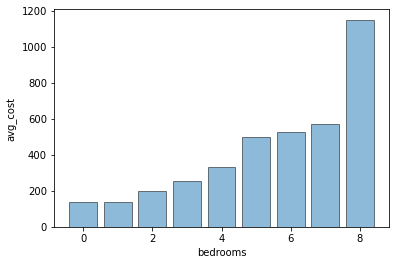

In [18]:
# 3.2
temp = abs2.groupby(["bedrooms"]).price_float.mean()
_ = plt.bar(temp.index, temp.values, edgecolor = "black", alpha = 0.5)
_ = plt.xlabel("bedrooms")
_ = plt.ylabel("avg_cost")
_ = plt.show()

The average cost grows as the number of rooms increases.